# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jessicarosedecunhacarmichael/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
load_dotenv("jess.env")
api_key = "a8002373511249d28bf4240002c343b1"

In [72]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)


In [6]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)


In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
bitcoin_df = pd.DataFrame(bitcoin_sentiments)   

In [8]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
ethereum_df = pd.DataFrame(ethereum_sentiments)   

In [9]:
bitcoin_df.describe()

,compound,negative,neutral,positive
count,98.000000,98.000000,98.000000,98.000000
mean,0.162083,0.045286,0.877449,0.077286
std,0.456500,0.066592,0.075121,0.058448
min,-0.865800,0.000000,0.588000,0.000000
25%,-0.121675,0.000000,0.838500,0.007250
50%,0.273200,0.000000,0.884000,0.090000
75%,0.507000,0.085000,0.910000,0.120250
max,0.790100,0.294000,1.000000,0.222000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,negative,neutral,positive
count,94.000000,94.000000,94.000000,94.000000
mean,0.056533,0.046223,0.893766,0.060011
std,0.429264,0.067060,0.086507,0.069236
min,-0.910000,0.000000,0.689000,0.000000
25%,-0.147275,0.000000,0.840250,0.000000
50%,0.000000,0.000000,0.909500,0.053500
75%,0.401900,0.075000,0.988000,0.089500
max,0.851900,0.309000,1.000000,0.311000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive score by 0.018053

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Expand the default stopwords list if necessary
lemmatizer = WordNetLemmatizer()
sw = stopwords.words('english')

In [14]:
def tokenizer(text):
    # Create a list of the words
    words = word_tokenize(text)
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    # Remove the punctuation
    re_clean = regex.sub('', text)  
    # Remove the stopwords
    words = word_tokenize(re_clean)   
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]   
    output = [word.lower() for word in lem if word.lower() not in sw]
    
    return output

In [15]:
# Create a new tokens column for Bitcoin
nltk.download('wordnet')

bitcoin_df['tokens'] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jessicarosedecunhacarmichael/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,compound,negative,neutral,positive,text,tokens
0,0.5994,0.000,0.851,0.149,"Casa, a Colorado-based provider of bitcoin sec...","[casa, coloradobased, provider, bitcoin, secur..."
1,0.0000,0.000,1.000,0.000,"In April, the Secret Service seized 100 Bitcoi...","[april, secret, service, seized, bitcoins, cla..."
2,-0.0516,0.071,0.864,0.065,"The question still remained, though, whether a...","[question, still, remained, though, whether, g..."
3,0.5106,0.000,0.878,0.122,A ransomware variant called NetWalker is doing...,"[ransomware, variant, called, netwalker, surpr..."
4,0.2732,0.000,0.937,0.063,“The COVID-19 pandemic has resulted in a mass ...,"[covid, pandemic, ha, resulted, mass, shift, w..."


In [16]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.7506,0.000,0.791,0.209,If you've interacted with cryptocurrencies in ...,"[youve, interacted, cryptocurrencies, past, co..."
1,0.0000,0.000,1.000,0.000,TL;DR: The Mega Blockchain Mastery Bundle is o...,"[tldr, mega, blockchain, mastery, bundle, sale..."
2,0.7579,0.000,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...,"[london, reuters, sound, like, surefire, bet, ..."
3,0.0000,0.000,1.000,0.000,NEW YORK (Reuters) - Brooklyn-based technology...,"[new, york, reuters, brooklynbased, technology..."
4,-0.2677,0.074,0.881,0.045,An outspoken Bitcoin whale who rarely shows af...,"[outspoken, bitcoin, whale, rarely, show, affe..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
btc_ngram = ngrams(tokenizer(bitcoin_df.text.str.cat()), n=2)
Counter(btc_ngram).most_common(10)

[(('satoshi', 'nakaboto'), 44),
 (('charsour', 'robot'), 22),
 (('robot', 'colleague'), 22),
 (('colleague', 'satoshi'), 22),
 (('nakaboto', 'writes'), 22),
 (('writes', 'bitcoin'), 22),
 (('every', 'fucking'), 22),
 (('fucking', 'daywelcome'), 22),
 (('daywelcome', 'another'), 22),
 (('another', 'edition'), 22)]

In [19]:
# Generate the Ethereum N-grams where N=2
ethereum_ngram = ngrams(tokenizer(ethereum_df.text.str.cat()), n=2)
Counter(ethereum_ngram).most_common(10)

[(('finance', 'defi'), 10),
 (('decentralized', 'finance'), 9),
 (('btc', 'trading'), 7),
 (('trading', 'around'), 7),
 (('ethereum', 'blockchain'), 6),
 (('ethereum', 'classic'), 6),
 (('around', 'utc'), 5),
 (('utc', 'pm'), 5),
 (('pm', 'et'), 5),
 (('et', 'slipping'), 5)]

In [20]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Get the top 10 words for Bitcoin
top_btc_wrds = tokenizer(bitcoin_df.text.str.cat())
token_count(top_btc_wrds, 10)

[('bitcoin', 80),
 ('satoshi', 44),
 ('nakaboto', 44),
 ('today', 24),
 ('every', 23),
 ('another', 23),
 ('edition', 23),
 ('tell', 23),
 ('going', 23),
 ('charsour', 22)]

In [22]:
# Get the top 10 words for Ethereum
top_eth_wrds = tokenizer(ethereum_df.text.str.cat())
token_count(top_eth_wrds, 10)

[('ethereum', 45),
 ('ha', 25),
 ('network', 20),
 ('blockchain', 17),
 ('bitcoin', 17),
 ('defi', 16),
 ('charsethereum', 15),
 ('cryptocurrency', 13),
 ('exchange', 13),
 ('trading', 12)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

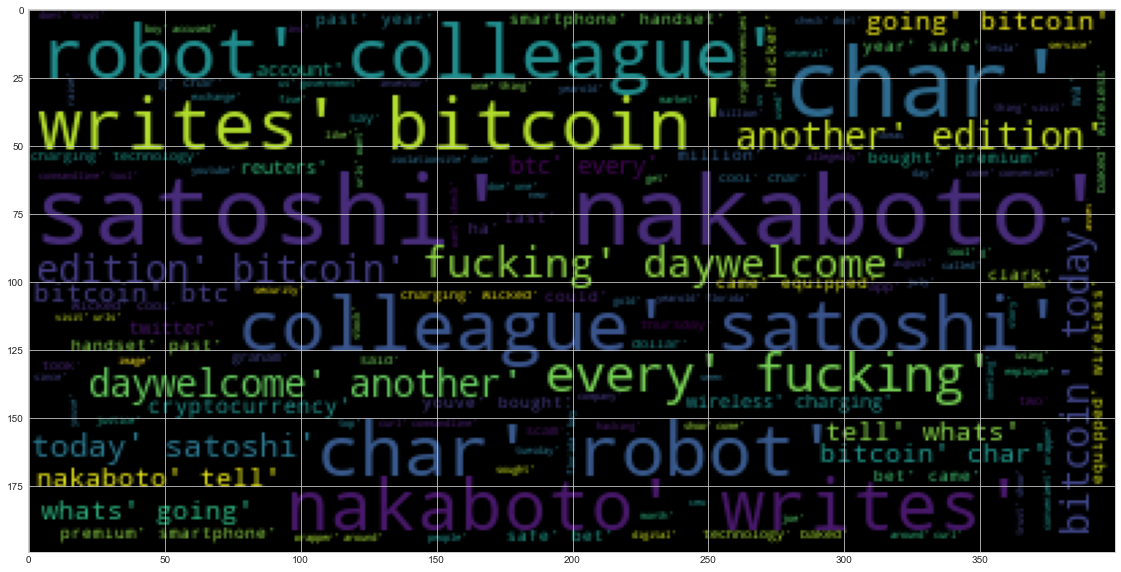

In [24]:
# Generate the Bitcoin word cloud
btc_wc = bitcoin_df['tokens'].astype(str)
b_wc = WordCloud().generate(' '.join(btc_wc))
plt.imshow(b_wc)

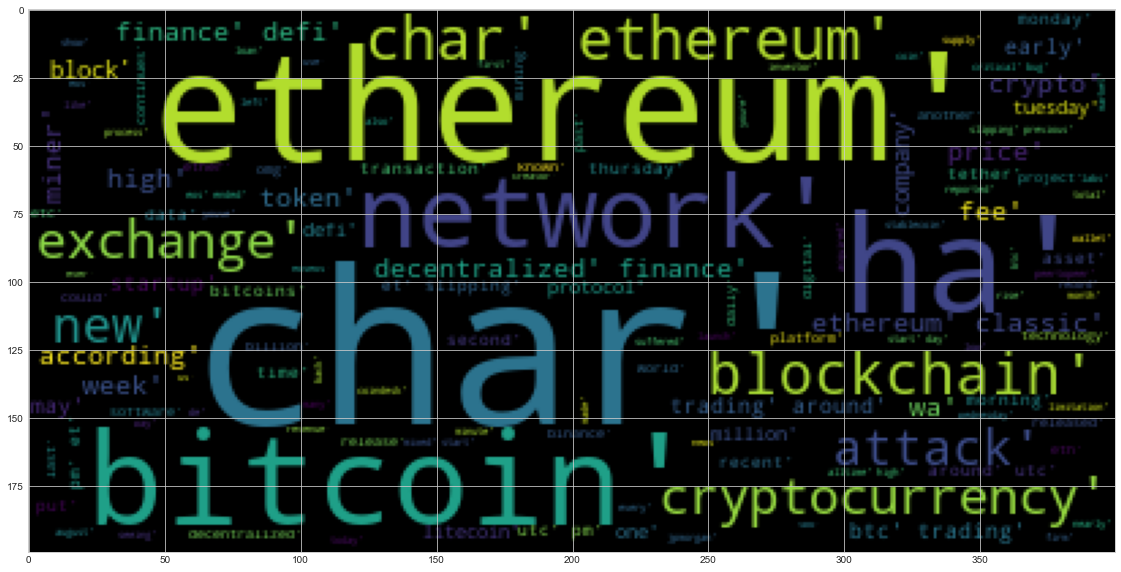

In [25]:
# Generate the Ethereum word cloud
eth_wc = ethereum_df['tokens'].astype(str)
e_wc = WordCloud().generate(' '.join(eth_wc))
plt.imshow(e_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [ ]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [55]:
# Concatenate all of the Bitcoin text together
all_btc_text = bitcoin_df['text'].str.cat()
all_btc_text[:1000]

"Casa, a Colorado-based provider of bitcoin security services, is launching a managed service allowing customers to buy and hold their own bitcoin, rather than using an external custodian like Coinbas… [+1571 chars]In April, the Secret Service seized 100 Bitcoins from Clark, NYT reports. Weeks later, Bennett received a letter explaining that the Secret Service had recovered 100 of his Bitcoins. The letter cited… [+884 chars]The question still remained, though, whether all that GPU-crunching would actually work. After months of hammering on the problem, Stay was finally ready to try. The Guy hadn't given the entire ZIP f… [+2880 chars]A ransomware variant called NetWalker is doing surprisingly well, even in this economy. The malware, which takes computers hostage and asks for a Bitcoin ransom, raked in $25 million in the last five… [+1606 chars]“The COVID-19 pandemic has resulted in a mass shift to working from home, resulting in increased use of corporate VPN and elimination of in-pers

In [56]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)

# Add a title to the document
doc.user_data["title"] = "BTC NER WORD CLOUD"

In [1]:
# Render the visualization
displacy.render(doc, style='ent')

NameError: name 'displacy' is not defined

In [66]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_])

['Casa', 'Colorado', 'Coinbas', 'April', 'the Secret Service', '100', 'Bitcoins', 'Clark', 'Weeks later', 'Bennett', 'the Secret Service', '100', 'months', 'Guy', 'NetWalker', 'Bitcoin', '$25 million', 'the last five', 'VPN', 'Reddit', 'over dozens', 'Friday', 'afternoon', 'pro-Donald Trump', 'Reuters', 'Bitcoin', 'over a year', 'Monday', '2020', 'March', '4.4%', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'Wednesday', '17-year-old', 'Florida', 'Twitter', 'last month', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoi

---

### Ethereum NER

In [64]:
# Concatenate all of the Ethereum text together
all_eth_text = ethereum_df['text'].str.cat()
all_eth_text[:1000]

"If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ether… [+2291 chars]TL;DR: The Mega Blockchain Mastery Bundle is on sale for £29.81 as of August 17, saving you 97% on list price.\r\nCash isn't necessarily king anymore. You've probably heard that cryptocurrency and bloc… [+1286 chars]LONDON (Reuters) - It sounds like a surefire bet. You lend money to a borrower who puts up collateral that exceeds the size of the loan, and then you earn interest of about 20%. What could possibly g… [+7143 chars]NEW YORK (Reuters) - Brooklyn-based technology startup ConsenSys has acquired JPMorgan Chase &amp; Co’s (JPM.N) marquee blockchain platform Quorum, the companies said on Tuesday. \r\nAs part of the dea… [+1915 chars]An outspoken Bitcoin whale who rarely shows affection for anything other than BTC says two crypto assets have potential.\r\nThe pseudonymou

In [67]:
# Run the NER processor on all of the text
doc = nlp(all_eth_text)

# Add a title to the document
doc.user_data["title"] = "ETHEREUM NER WORD CLOUD"

In [71]:
# Render the visualization
displacy.render(doc, style='ent')

In [69]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_])

['the past couple of years', '29.81', 'August 17', '97%', 'Reuters', 'about 20%', 'YORK', 'Reuters', 'Brooklyn', 'ConsenSys', 'JPMorgan Chase &amp', 'Quorum', 'Tuesday', 'Bitcoin', 'BTC', 'two', 'UNUS SED LEO', 'LEO', 'Rick Wilking', 'ul><li', 'Michael Novogratz', 'Bloomberg', 'up to $3,000', 'The Galaxy Digital', 'Fed', '4', '2020', '5', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'first', 'second', 'one', 'bitcoin', 'more than 10%', '24-hour', 'Ethereum', 'Mateusz Slodkowski/', 'Bitcoin', 'Bitcoin', 'as high as $12,086', 'Ethereum (ETH', 'Medalla', 'the Ethereum Foundation', 'ul><li', 'Medalla', 'Aug. 2', '418', '5 minutes', '25%', 'Binance Futures', 'ETH', 'as low as $302', '385', '10 minutes', 'chars]usa', 'one hundred dollar', 'Fintech', 'YouTube', 'Bitcoin', 'one-week', 'ul><li', 'Bitcoin', 'BTC', 'around $11,595', '20:0', 'Creator Coin', 'Creator Coin', 'Monday', '500', 'less than 1%', '3 p.m. EDT', 'Ho', 'Tuesday', 'DeFi', 'ul><li', 'Bitcoi

---